In [1]:
# You'll need pygrib. The best way to get pygrib is:
# sudo apt-get install python-grib

# From http://polar.ncep.noaa.gov/waves/examples/usingpython.shtml
# Example 2: Plot data from an NWW3 GRiB2 file
# This example requires that you download a GRiB2 file from either our NOMADS data server or the Production FTP Server (see our Data Access page for more information. For this exercise, I used the file multi_1.at_10m.t00z.f000.grib2 retrieved from NOMADS. This example assumes that the GRiB2 file is in the current working directory.

# Begin by importing the necessary modules and set up the figure

import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure()
grib='grib/multi_reanal.glo_30m_ext.hs.197901.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(1)[0]
grb = grbs.select(name='Significant height of combined wind waves and swell')[1]
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the limits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height from GRiB, Jan 1979')
plt.show()

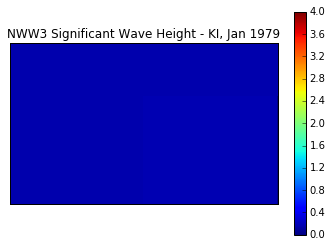

masked_array(data =
 [[0.18]],
             mask =
 [[False]],
       fill_value = 9999.0)

In [2]:
plt.figure()
grib='grib/multi_reanal.glo_30m_ext.hs.197901.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(1)[0]
grb = grbs.select(name='Significant height of combined wind waves and swell')[1]
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the limits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=157, \
  urcrnrlon=158,llcrnrlat=1.6,urcrnrlat=2.2, \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height - KI, Jan 1979')
plt.show()

data, lats, lons = grb.data(lat1=1.6,lat2=2.2,lon1=157.1,lon2=157.5)

data

In [ ]:
# From https://stackoverflow.com/questions/39778290/accessing-many-grib-messages-at-once-with-pygrib
# substitute with a list of your file names
# glob is a builtin library that can help accomplish this
files = list_of_files

grib = pygrib.open(files[0]) # start with the first one

# grib message numbering starts at 1
data, lats, lons = grib.message(1).data()

# while np.expand_dims works, the following is shorter
# syntax wise and will accomplish the same thing
data = data[None,...] # add an empty dimension as axis 0

for m in xrange(2, grib.messages + 1):
    data = np.vstack((data, grib.message(m).values[None,...]))

grib.close()  # good practice

# now data has all the values from each message in the first file stacked up 
# time to stack the rest on there
for file_ in files[1:]:  # all except the first file which we've done
    grib = pygrib.open(file_)
    for msg in grib:
       data = np.vstack((data, msg.values[None,...]))

   grib.close()
print data.shape # should be (80 * len(files), nlats, nlons)

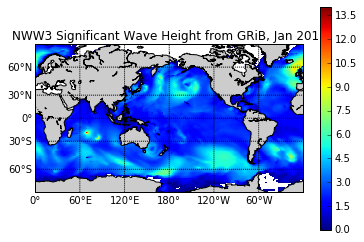

In [35]:
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure()
grib='grib/multi_1.glo_30m.hs.201501.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(1)[0]
grb = grbs.select(name='Significant height of combined wind waves and swell')[240] # This is the time !
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the limits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height from GRiB, Jan 2015')
plt.show()




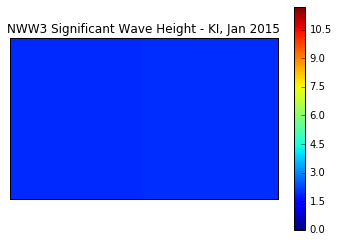

masked_array(data =
 [[1.97]],
             mask =
 [[False]],
       fill_value = 9999.0)

In [103]:
plt.figure()
grib='grib/multi_1.glo_30m.hs.201501.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(128)[0]
grb = grbs.select(name='Significant height of combined wind waves and swell')[248] #167 2.52
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the imits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=157, \
  urcrnrlon=158,llcrnrlat=1.6,urcrnrlat=2.2, \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height - KI, Jan 2015')
plt.show()

data, lats, lons = grb.data(lat1=1.6,lat2=2.2,lon1=157.1,lon2=157.5)

data

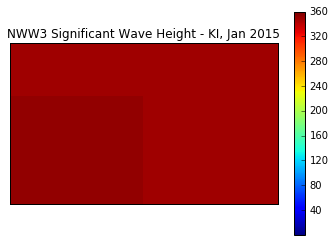

masked_array(data =
 [[349.31]],
             mask =
 [[False]],
       fill_value = 9999.0)

In [122]:
plt.figure()
grib='grib/multi_1.glo_30m.dp.201501.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(1)[0]
grb = grbs.select()[167] #167 2.52
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the imits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=157, \
  urcrnrlon=158,llcrnrlat=1.6,urcrnrlat=2.2, \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height - KI, Jan 2015')
plt.show()

data, lats, lons = grb.data(lat1=1.6,lat2=2.2,lon1=157.1,lon2=157.5)

data

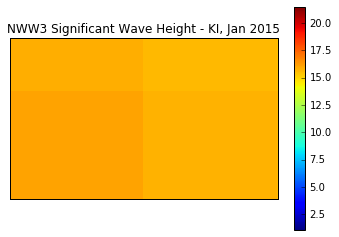

masked_array(data =
 [[15.8]],
             mask =
 [[False]],
       fill_value = 9999.0)

In [127]:
plt.figure()
grib='grib/multi_1.glo_30m.tp.201501.grb2';
grbs=pygrib.open(grib)
# Remember that indexing in Python starts at zero.
grbs.read(1)[0]
grb = grbs.select()[167] #167 2.52
data=grb.values
lat,lon = grb.latlons()
# Plot the field using Basemap. Start with setting the map projection using the imits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=30,llcrnrlon=157, \
  urcrnrlon=158,llcrnrlat=1.6,urcrnrlat=2.2, \
  resolution='c')
# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('NWW3 Significant Wave Height - KI, Jan 2015')
plt.show()

data, lats, lons = grb.data(lat1=1.6,lat2=2.2,lon1=157.1,lon2=157.5)

data



ModuleNotFoundError: No module named 'pygrib'

[[  5.49300000e+01   2.99500000e+01   3.06000000e+01   4.49900000e+01
    4.47900000e+01   4.58000000e+01   5.63800000e+01   5.99200000e+01
    6.17300000e+01   6.30000000e+01   6.31200000e+01   6.22200000e+01
    6.09200000e+01   5.97200000e+01   5.89000000e+01   5.85400000e+01
    5.88700000e+01   5.89500000e+01   5.85400000e+01   5.93200000e+01
    6.02500000e+01   6.09400000e+01   6.11800000e+01   6.11200000e+01
    6.11200000e+01   6.10400000e+01   6.06700000e+01   6.02700000e+01
    6.00400000e+01   5.99800000e+01   5.97500000e+01   5.94200000e+01
    5.91700000e+01   5.91900000e+01   5.93200000e+01   5.94700000e+01
    5.97100000e+01   5.97900000e+01   5.97100000e+01   5.98700000e+01
    6.02300000e+01   5.95800000e+01   6.11600000e+01   6.22300000e+01
    6.19700000e+01   6.10500000e+01   6.09700000e+01   6.17500000e+01
    6.31800000e+01   6.44500000e+01   6.48200000e+01   6.37300000e+01
    6.16200000e+01   3.40740000e+02   5.62000000e+01   3.45830000e+02
    3.48100000e+02  

[[ 2.25  2.24  2.24  2.23  2.23  2.33  2.45  2.48  2.44  2.38  2.32  2.29
   2.27  2.26  2.27  2.28  2.28  2.31  2.33  2.33  2.32  2.3   2.29  2.3
   2.32  2.33  2.37  2.41  2.46  2.52  2.61  2.7   2.74  2.71  2.64  2.57
   2.5   2.45  2.42  2.4   2.39  2.37  2.38  2.4   2.42  2.41  2.36  2.29
   2.22  2.19  2.2   2.18  2.1   2.02  1.94  1.87  1.85  1.84  1.82  1.76
   1.74  1.76  1.81  1.88  2.04  2.21  2.31  2.33  2.29  2.24  2.2   2.17
   2.14  2.13  2.11  2.08  2.04  1.97  1.88  1.81  1.76  1.7   1.65  1.6
   1.56  1.56  1.6   1.7   1.8   1.86  1.89  1.9   1.91  1.92  1.94  1.95
   1.98  2.03  2.04  2.03  2.01  1.98  1.96  1.94  1.94  1.93  1.92  1.91
   1.91  1.91  1.91  1.91  1.9   1.89  1.88  1.89  1.96  2.04  2.12  2.18
   2.22  2.24  2.26  2.26  2.27  2.26  2.25  2.23  2.21  2.18  2.14  2.08
   2.04  1.99  1.95  1.91  1.88  1.86  1.84  1.83  1.82  1.81  1.8   1.78
   1.75  1.72  1.68  1.65  1.61  1.57  1.53  1.49  1.46  1.44  1.41  1.38
   1.35  1.33  1.32  1.37  1.49  1.67  1

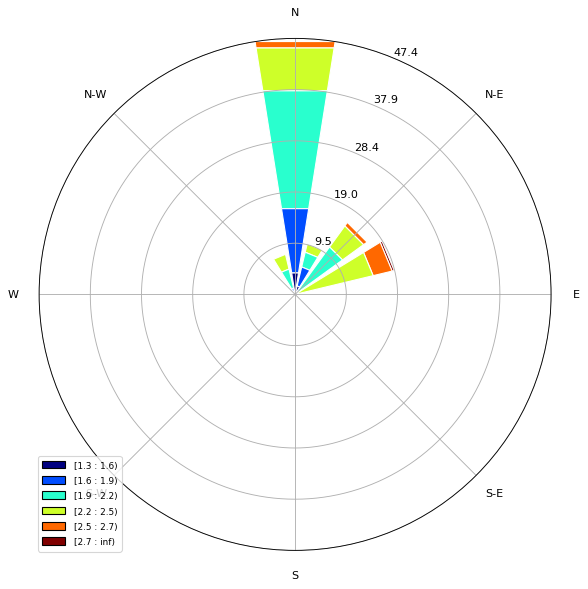

In [36]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas

dp = np.load('dp.npy')
hs = np.load('hs.npy')

ax = WindroseAxes.from_ax()
ax.bar(dp, hs, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

plt.show()

In [35]:
plt.close()
